# Проект по курсу Машинное обучение
### 1курс маг. 6 группа. Полтавский Артем, Мезга Александр
### Датасет: https://archive.ics.uci.edu/ml/datasets/Dishonest+Internet+users+Dataset
### Референсная статья: https://www.hindawi.com/journals/complexity/2020/4579495/
### Точность предсказаний которую нужно превзойти: 93.87%

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import  confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

# Загрузка данных. Первоначальный анализ

In [33]:
filename = "dishonest-internet-users-dataset.csv"
data= pd.read_csv(filename)
df = pd.DataFrame(data)
df

,ctrust,cuntrust,last,context,score
0,4,1,4,sport,untrustworthy
1,4,1,4,sport,untrustworthy
2,1,4,4,sport,trustworthy
3,2,1,4,sport,trustworthy
4,3,1,4,sport,trustworthy
...,...,...,...,...,...
317,2,1,2,holiday,untrustworthy
318,1,1,1,holiday,trustworthy
319,1,1,1,holiday,trustworthy
320,1,1,1,holiday,trustworthy


In [34]:
df.describe()

,ctrust,cuntrust,last
count,322.000000,322.000000,322.000000
mean,2.195652,1.527950,2.366460
std,1.273592,1.105422,1.347384
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,1.000000,2.000000
75%,4.000000,1.000000,4.000000
max,4.000000,5.000000,4.000000


In [35]:
print('ctrust',df.ctrust.unique())
print('cuntrust',df.cuntrust.unique())
print('last',df['last'].unique())
print('context',df.context.unique())
print('score',df.score.unique())

ctrust [4 1 2 3]
cuntrust [1 4 3 5]
last [4 1 3 2]
context ['sport' 'game' 'ECommerce' 'holiday']
score ['untrustworthy' 'trustworthy']


# Перевод признаков из строк в категориальные значения

In [36]:
df['score'].replace({'untrustworthy':0,'trustworthy':1},inplace=True)
df

,ctrust,cuntrust,last,context,score
0,4,1,4,sport,0
1,4,1,4,sport,0
2,1,4,4,sport,1
3,2,1,4,sport,1
4,3,1,4,sport,1
...,...,...,...,...,...
317,2,1,2,holiday,0
318,1,1,1,holiday,1
319,1,1,1,holiday,1
320,1,1,1,holiday,1


In [37]:
df['context'].replace({'sport':1,'game':2,'ECommerce':3,'holiday':4},inplace=True)
df

,ctrust,cuntrust,last,context,score
0,4,1,4,1,0
1,4,1,4,1,0
2,1,4,4,1,1
3,2,1,4,1,1
4,3,1,4,1,1
...,...,...,...,...,...
317,2,1,2,4,0
318,1,1,1,4,1
319,1,1,1,4,1
320,1,1,1,4,1


# Разделение данныех на X и y, нормализовка данных

In [38]:
y=data.score.values
x_data=data.drop("score",axis=1)

In [39]:
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
x

,ctrust,cuntrust,last,context
0,1.000000,0.00,1.000000,0.0
1,1.000000,0.00,1.000000,0.0
2,0.000000,0.75,1.000000,0.0
3,0.333333,0.00,1.000000,0.0
4,0.666667,0.00,1.000000,0.0
...,...,...,...,...
317,0.333333,0.00,0.333333,1.0
318,0.000000,0.00,0.000000,1.0
319,0.000000,0.00,0.000000,1.0
320,0.000000,0.00,0.000000,1.0


In [41]:
# split data for test
split_test=False
if split_test:
    percent = 0.3
    part = int(x.shape[0]*percent)

    test_x_data = x[-part:]
    test_y_data = y[-part:]

    x = x[:-part]
    y = y[:-part]
    print(f'test : {percent*100}%, size: {test_x_data.shape[0]}, train size: {x.shape[0]}')
    print(test_x_data)
    print(x)

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split

from tabulate import tabulate

# SVM

In [44]:
def calc_svm(x_train,x_test,y_train,y_test):    
    svm_classifier = SVC(kernel='linear')
    svm_classifier.fit(x_train, y_train)
    y_pred = svm_classifier.predict(x_test)
#     df_test = pd.DataFrame({'predicted': np.array(y_pred), 'ground truth': np.array(y_test)})
    confu_svm=confusion_matrix(y_test,y_pred)
    accuracy_svm=accuracy_score(y_test,y_pred)
    precision_svm=precision_score(y_test,y_pred)
    recall_svm=recall_score(y_test,y_pred)
    f1_svm=f1_score(y_test,y_pred)
#     print(df_test)
    return ([accuracy_svm,precision_svm,recall_svm,f1_svm], confu_svm)

# Naive Bayes

In [18]:
def calc_nb(x_train,x_test,y_train,y_test):
    nb=GaussianNB()
    nb.fit(x_train,y_train)
    y_pred = nb.predict(x_test)
#     df_test = pd.DataFrame({'predicted': np.array(y_pred), 'ground truth': np.array(y_test)})
    confu_nb=confusion_matrix(y_test,y_pred)
    accuracy_nb=accuracy_score(y_test,y_pred)
    precision_nb=precision_score(y_test,y_pred)
    recall_nb=recall_score(y_test,y_pred)
    f1_nb=f1_score(y_test,y_pred)
#     print(df_test)
    return ([accuracy_nb,precision_nb,recall_nb,f1_nb], confu_nb)

# Результаты SVM и Naive Bayes

In [46]:
def compare_results(x, y, train_size=0.8):
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=train_size,random_state=42)
    
    if split_test:
        x_test = test_x_data
        y_test = test_y_data
    
    a='SVM'
    svm_results = calc_svm(x_train,x_test,y_train,y_test)
    b='Naive Bayes'
    nb_results = calc_nb(x_train,x_test,y_train,y_test)
    
    confu_nb = nb_results[1]
    result1=(a,*nb_results[0])
    
    confu_svm = svm_results[1]
    result2=(b,*svm_results[0])
    
    result=(result1,result2)
    print('confusion matrix SVM')
    print(confu_svm)

    print('confusion matrix Naive Bayes')
    print(confu_nb)

    print(tabulate(result, headers=["accuracy", "precision", "recall","f1_score"]))

In [47]:
compare_results(x,y,train_size=0.2)

confusion matrix SVM
[[ 59   9]
 [ 42 148]]
confusion matrix Naive Bayes
[[ 24  44]
 [ 27 163]]
               accuracy    precision    recall    f1_score
-----------  ----------  -----------  --------  ----------
SVM            0.724806     0.78744   0.857895    0.821159
Naive Bayes    0.802326     0.942675  0.778947    0.853026


# Стэкинг моделей:
## 0 уровень: SVM + Naive Bayes 
## 1 уровень: LogisticRegression

In [50]:
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
#     print(model)
    return model

# Сводные результаты стэкинга, SVM и Гаусса

In [51]:
from sklearn.metrics import accuracy_score
exp_results = []
for train_size in [i/100 for i in range(10,95, 5)]:
#     train_size = 0.95
    X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=train_size,random_state=37)
    
    if split_test:
        X_test = test_x_data
        y_test = test_y_data
    clf = get_stacking()
    stacking_acc = clf.fit(X_train, y_train).score(X_test, y_test)
    # Classic way to calculate accuracy
    #     y_pred_clf = clf.predict(X_test)
    #     clf_acc = accuracy_score(y_test, y_pred_clf)
    #     print(f'{clf_acc} == {stacking_acc}')
    exp_results.append([stacking_acc, train_size, "stacking"])

    svm_results = calc_svm(X_train,X_test,y_train,y_test)
    exp_results.append([svm_results[0][0], train_size, "svm"])

    nb_results = calc_nb(X_train,X_test,y_train,y_test)
    exp_results.append([nb_results[0][0], train_size, "Naive Bayes"])
    

In [52]:
np_results = np.array(exp_results)
df_results = pd.DataFrame({'accuracy': np_results[:, 0], 'train_size': np_results[:, 1], 'label': np_results[:, 2]})

In [53]:
df_results

,accuracy,train_size,label
0,0.8068965517241379,0.1,stacking
1,0.6896551724137931,0.1,svm
2,0.7482758620689656,0.1,Naive Bayes
3,0.9927007299270073,0.15,stacking
4,0.7372262773722628,0.15,svm
5,0.6897810218978102,0.15,Naive Bayes
6,0.9147286821705426,0.2,stacking
7,0.7325581395348837,0.2,svm
8,0.7364341085271318,0.2,Naive Bayes
9,0.9132231404958677,0.25,stacking


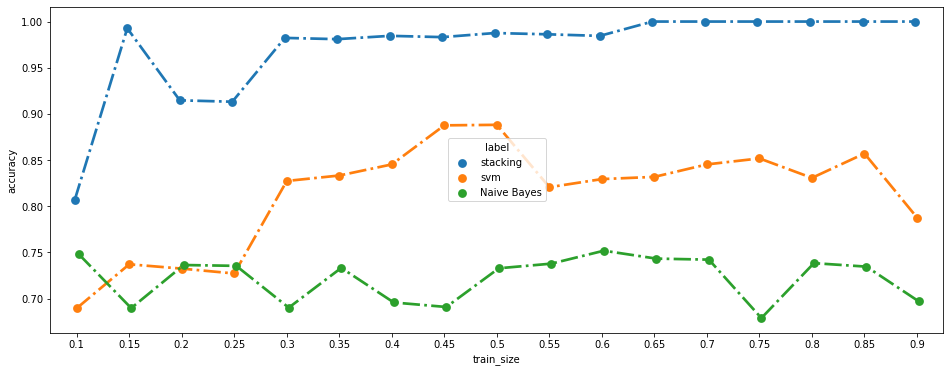

In [54]:
plt.figure(figsize=(16, 6))
ax = sns.pointplot(x="train_size", y="accuracy", hue="label", linestyles = '-.', 
                   data=df_results, dodge=True, scale=1)

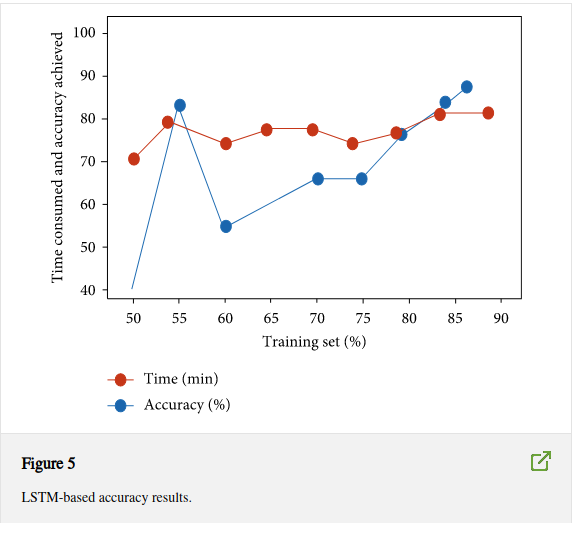